#                                  **UPI Fraud Detection Data Analysis Project**

#### The rise of digital payments has made financial transactions quicker and more convenient, with UPI (Unified Payments Interface) becoming a popular method in India. However, this increase in online transactions has also led to a rise in fraud. Detecting and preventing UPI fraud is crucial for ensuring the safety of users and the integrity of financial systems.

#### This project focuses on analysing UPI transaction data to identify patterns and detect suspicious activities. By using data analysis techniques, we aim to spot potential fraud early, protect users, and enhance the overall security of UPI transactions. Through this project, we will develop insights that can help in building more effective fraud detection systems, reducing the risk of fraudulent transactions and making digital payments safer for everyone.

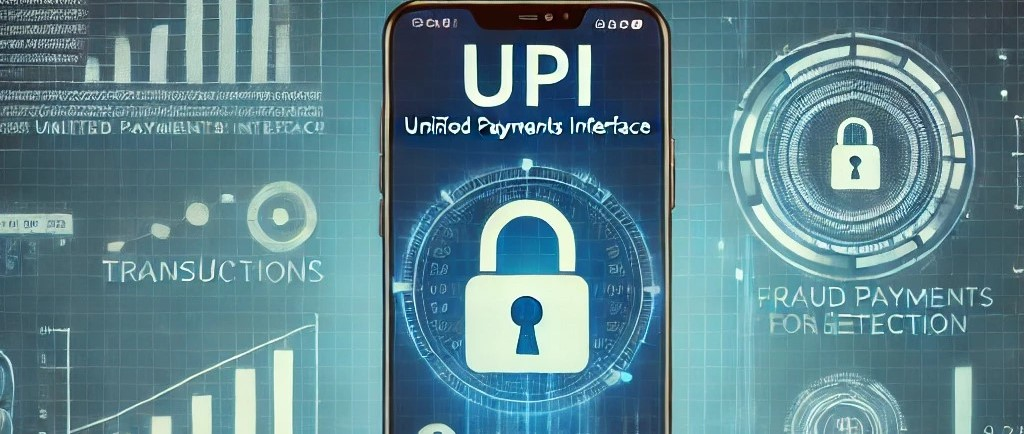

**Importing Libaries**

In [318]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as px
import plotly.express as px
import pyforest

**Data Collection**


*   Import the Data
*   Pandas for data Manipulation

In [348]:
# Read CSV File
df = pd.read_csv(r"F:\Anudip Foundation\Python Programming\Project\UPI Data.csv")

In [350]:
# Top 5 rows of Data
df.head()

,Transaction_ID,Date,Time,Merchant_ID,Customer_ID,Device_ID,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,IP_Address,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud
0,T00022452,20/04/23,4:50:22 AM,f65a902b-2396-40cc-9593-97e103f1bc15,89aaeceb-21f5-46c8-9de3-89dde6a10a75,c1e0deb4-7c97-4178-a838-38f4a2f0b57c,Refund,SamplePay,Durgapur,Chhattisgarh,140.213.7.48,Completed,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1
1,T00032233,08/08/23,8:09:21 AM,d4a5efcb-4eb6-4d3a-8132-07bb3e6e13a4,8a8962f9-e84a-4573-ab0b-187311978a21,62e14f64-b0ba-4284-889a-51ac05baf33e,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,184.108.177.45,Pending,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1
2,T00037364,25/06/23,7:49:01 AM,759ad138-9473-4729-8699-3d72c7ffb983,c3f53ce6-e305-4460-a71d-93bde26043ab,4281c542-ac77-4269-b4bb-1de93ac12677,Bank Transfer,Other,New Delhi,Himachal Pradesh,16.106.248.163,Failed,Android,2,Utilities,Online,44.19,22,106.69,1
3,T00015924,28/01/24,5:44:12 AM,d8f561e4-bded-4ef0-bcd8-5494b2e31a94,9f0c5613-7d4c-4454-bee1-c47fbba406a1,058b6488-2469-42f2-bc7f-707921d35cad,Subscription,UPI Pay,Bharatpur,Chhattisgarh,65.245.160.212,Failed,Android,0,Purchases,Online,-54.34,28,3611.11,1
4,T00021805,21/06/23,9:40:59 AM,26fdd7a1-8537-4dfe-bcf7-f5a127b36682,bf9aa6d5-7d3d-43f9-8631-31336720a383,068ff12c-127a-4cfb-9899-ddde37060b28,Investment,Dummy Bank,Sagar,Mizoram,33.172.152.38,Completed,MacOS,1,Other,Online,12.38,25,374.89,1


In [51]:
# Last 5 Rows of Data
df.tail()

,Transaction_ID,Date,Time,Merchant_ID,Customer_ID,Device_ID,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,IP_Address,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud
642,T00026082,24/07/23,3:12:04 AM,6696dc2b-d48e-4880-8845-e65aa1df8d7d,4ab8bcd6-295c-4ae5-b4f5-2f3182a969c8,a1f5d01e-a69f-404d-b2ce-6ff4bb17de62,Bill Payment,Gamma Bank,Hyderabad,Assam,34.163.43.64,Pending,iOS,4,Travel bookings,In-store,14.00,25,28.27,0
643,T00017272,05/07/23,6:21:18 AM,f2af26ef-0e08-42f8-b6ed-eaab786f5bf6,6cd4af1c-6564-47eb-bcf9-cd44c45c0f2b,36d089dd-b74d-4157-ba29-823b85368169,Purchase,Other,Bangalore,Tripura,129.125.172.104,Pending,Windows,10,More Services,Mobile,-33.38,28,26.26,0
644,T00048923,16/04/23,8:32:41 AM,c6ce37eb-332d-4e4f-995f-fba48d4dedb9,690bd64f-5c83-41b8-873a-57c9bc6bb132,668b172d-b1ab-438b-9650-358bc8d48494,Bill Payment,Other,Mumbai,Arunachal Pradesh,27.48.57.181,Failed,Android,1,More Services,Online,-44.37,19,6.02,0
645,T00022497,28/10/23,9:33:42 AM,b8ac3703-52dc-4372-b59b-4f9b51a5a855,48b40bc8-a730-4420-9702-2beecca286f0,e18b7076-1718-475e-81de-9ff2c392d194,Bank Transfer,Bank of Data,Vijayawada,Madhya Pradesh,206.122.250.79,Failed,Windows,2,Investment,In-store,-57.29,12,17.12,0
646,T00032445,11/04/24,10:48:14 AM,9d40b579-b71e-4d16-8917-fce4ecdf9183,108391b3-9545-49f8-be38-e356e64e8912,9a6daf2d-c57f-4dbd-ae2b-86d49a9d60e3,Bank Transfer,Dummy Bank,Ichalkaranji,Assam,165.92.164.116,Completed,iOS,2,Brand Vouchers and OTT,In-store,-11.94,26,50.60,0


In [29]:
df.columns

Index(['Transaction_ID', 'Date', 'Time', 'Merchant_ID', 'Customer_ID',
       'Device_ID', 'Transaction_Type', 'Payment_Gateway', 'Transaction_City',
       'Transaction_State', 'IP_Address', 'Transaction_Status', 'Device_OS',
       'Transaction_Frequency', 'Merchant_Category', 'Transaction_Channel',
       'Transaction_Amount_Deviation', 'Days_Since_Last_Transaction', 'amount',
       'fraud'],
      dtype='object')

In [35]:
# Datatypes Overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_ID                647 non-null    object 
 1   Date                          647 non-null    object 
 2   Time                          647 non-null    object 
 3   Merchant_ID                   647 non-null    object 
 4   Customer_ID                   647 non-null    object 
 5   Device_ID                     647 non-null    object 
 6   Transaction_Type              647 non-null    object 
 7   Payment_Gateway               647 non-null    object 
 8   Transaction_City              647 non-null    object 
 9   Transaction_State             647 non-null    object 
 10  IP_Address                    647 non-null    object 
 11  Transaction_Status            647 non-null    object 
 12  Device_OS                     647 non-null    object 
 13  Trans

In [41]:
# Descriptive Statistics:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Transaction_Frequency,647.0,3.564142,6.454543,0.00,1.000,2.00,3.00,50.00
Transaction_Amount_Deviation,647.0,5.014668,56.375914,-99.47,-42.355,8.38,52.29,99.45
Days_Since_Last_Transaction,647.0,15.717156,8.218122,1.00,8.500,16.00,23.00,29.00
amount,647.0,128.839753,364.995747,0.12,17.155,35.00,74.77,4883.62
fraud,647.0,0.239567,0.427150,0.00,0.000,0.00,0.00,1.00


# Data Preparation and Data Cleanning


*   Duplicate Values
*   Missing Values
*   Unique Values
*   Removing / Dropping the unique values

In [58]:
df.duplicated().sum()

0

There are no duplicate values in the Dataset

In [71]:
df.isnull().sum()

Transaction_ID                  0
Date                            0
Time                            0
Merchant_ID                     0
Customer_ID                     0
Device_ID                       0
Transaction_Type                0
Payment_Gateway                 0
Transaction_City                0
Transaction_State               0
IP_Address                      0
Transaction_Status              0
Device_OS                       0
Transaction_Frequency           0
Merchant_Category               0
Transaction_Channel             0
Transaction_Amount_Deviation    0
Days_Since_Last_Transaction     0
amount                          0
fraud                           0
dtype: int64

In [73]:
df.shape

(647, 20)

In [77]:
# Unique values in the Dataset
df.nunique()

Transaction_ID                  647
Date                            302
Time                            641
Merchant_ID                     647
Customer_ID                     647
Device_ID                       647
Transaction_Type                  7
Payment_Gateway                   9
Transaction_City                281
Transaction_State                28
IP_Address                      647
Transaction_Status                3
Device_OS                         4
Transaction_Frequency            14
Merchant_Category                10
Transaction_Channel               3
Transaction_Amount_Deviation    635
Days_Since_Last_Transaction      29
amount                          633
fraud                             2
dtype: int64

### Drop the Unique Values

In [48]:
df.columns

Index(['Transaction_ID', 'Date', 'Time', 'Merchant_ID', 'Customer_ID',
       'Device_ID', 'Transaction_Type', 'Payment_Gateway', 'Transaction_City',
       'Transaction_State', 'IP_Address', 'Transaction_Status', 'Device_OS',
       'Transaction_Frequency', 'Merchant_Category', 'Transaction_Channel',
       'Transaction_Amount_Deviation', 'Days_Since_Last_Transaction', 'amount',
       'fraud'],
      dtype='object')

In [60]:
# Drop Function
df.drop(['Transaction_ID', 'Merchant_ID', 'Customer_ID', 'Device_ID', 'IP_Address'], axis=1, inplace=True)
#Drop does not modify the Original Dataset

In [62]:
df.head(2)

,Date,Time,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,Transaction_Status,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud
0,20/04/23,4:50:22 AM,Refund,SamplePay,Durgapur,Chhattisgarh,Completed,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1
1,08/08/23,8:09:21 AM,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,Pending,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1


In [132]:
# Importing Date and Time Module in Python
import datetime as dt

In [174]:
df['Date']=pd.to_datetime(df['Date'],format='%d/%m/%y')

# Creating a new Coloumn 'Year' with help of Datetime
df['Year'] = df['Date'].dt.year

# Creating a new Coloumn 'Month' with help of Datetime
df['Month'] = df['Date'].dt.month

<IPython.core.display.Javascript object>

In [180]:
df.head()

,Transaction_ID,Date,Time,Merchant_ID,Customer_ID,Device_ID,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,...,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud,Year,Month
0,T00022452,2023-04-20,4:50:22 AM,f65a902b-2396-40cc-9593-97e103f1bc15,89aaeceb-21f5-46c8-9de3-89dde6a10a75,c1e0deb4-7c97-4178-a838-38f4a2f0b57c,Refund,SamplePay,Durgapur,Chhattisgarh,...,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1,2023,4
1,T00032233,2023-08-08,8:09:21 AM,d4a5efcb-4eb6-4d3a-8132-07bb3e6e13a4,8a8962f9-e84a-4573-ab0b-187311978a21,62e14f64-b0ba-4284-889a-51ac05baf33e,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,...,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1,2023,8
2,T00037364,2023-06-25,7:49:01 AM,759ad138-9473-4729-8699-3d72c7ffb983,c3f53ce6-e305-4460-a71d-93bde26043ab,4281c542-ac77-4269-b4bb-1de93ac12677,Bank Transfer,Other,New Delhi,Himachal Pradesh,...,Android,2,Utilities,Online,44.19,22,106.69,1,2023,6
3,T00015924,2024-01-28,5:44:12 AM,d8f561e4-bded-4ef0-bcd8-5494b2e31a94,9f0c5613-7d4c-4454-bee1-c47fbba406a1,058b6488-2469-42f2-bc7f-707921d35cad,Subscription,UPI Pay,Bharatpur,Chhattisgarh,...,Android,0,Purchases,Online,-54.34,28,3611.11,1,2024,1
4,T00021805,2023-06-21,9:40:59 AM,26fdd7a1-8537-4dfe-bcf7-f5a127b36682,bf9aa6d5-7d3d-43f9-8631-31336720a383,068ff12c-127a-4cfb-9899-ddde37060b28,Investment,Dummy Bank,Sagar,Mizoram,...,MacOS,1,Other,Online,12.38,25,374.89,1,2023,6


In [190]:
# Sort the month Series to array
df['Month'].sort_values(ascending=True).unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [196]:
# Month coloum to have format 'MMM' as compared to numbers 1-12
# Creating a dictionary with key: Value pairs for the number of months and their respective names 
# Defining the values in my dictionary:
months = {
    1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul',8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}

In [206]:
# Map the dictionary to the month coloumn
df['Month'] = df['Month'].map(months)

In [208]:
df.Month

0      Apr
1      Aug
2      Jun
3      Jan
4      Jun
      ... 
642    Jul
643    Jul
644    Apr
645    Oct
646    Apr
Name: Month, Length: 647, dtype: object

In [210]:
df.head()

,Transaction_ID,Date,Time,Merchant_ID,Customer_ID,Device_ID,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,...,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud,Year,Month
0,T00022452,2023-04-20,4:50:22 AM,f65a902b-2396-40cc-9593-97e103f1bc15,89aaeceb-21f5-46c8-9de3-89dde6a10a75,c1e0deb4-7c97-4178-a838-38f4a2f0b57c,Refund,SamplePay,Durgapur,Chhattisgarh,...,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1,2023,Apr
1,T00032233,2023-08-08,8:09:21 AM,d4a5efcb-4eb6-4d3a-8132-07bb3e6e13a4,8a8962f9-e84a-4573-ab0b-187311978a21,62e14f64-b0ba-4284-889a-51ac05baf33e,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,...,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1,2023,Aug
2,T00037364,2023-06-25,7:49:01 AM,759ad138-9473-4729-8699-3d72c7ffb983,c3f53ce6-e305-4460-a71d-93bde26043ab,4281c542-ac77-4269-b4bb-1de93ac12677,Bank Transfer,Other,New Delhi,Himachal Pradesh,...,Android,2,Utilities,Online,44.19,22,106.69,1,2023,Jun
3,T00015924,2024-01-28,5:44:12 AM,d8f561e4-bded-4ef0-bcd8-5494b2e31a94,9f0c5613-7d4c-4454-bee1-c47fbba406a1,058b6488-2469-42f2-bc7f-707921d35cad,Subscription,UPI Pay,Bharatpur,Chhattisgarh,...,Android,0,Purchases,Online,-54.34,28,3611.11,1,2024,Jan
4,T00021805,2023-06-21,9:40:59 AM,26fdd7a1-8537-4dfe-bcf7-f5a127b36682,bf9aa6d5-7d3d-43f9-8631-31336720a383,068ff12c-127a-4cfb-9899-ddde37060b28,Investment,Dummy Bank,Sagar,Mizoram,...,MacOS,1,Other,Online,12.38,25,374.89,1,2023,Jun


In [214]:
df.columns

Index(['Transaction_ID', 'Date', 'Time', 'Merchant_ID', 'Customer_ID',
       'Device_ID', 'Transaction_Type', 'Payment_Gateway', 'Transaction_City',
       'Transaction_State', 'IP_Address', 'Transaction_Status', 'Device_OS',
       'Transaction_Frequency', 'Merchant_Category', 'Transaction_Channel',
       'Transaction_Amount_Deviation', 'Days_Since_Last_Transaction', 'amount',
       'fraud', 'Year', 'Month'],
      dtype='object')

In [216]:
# Drop the Date coloumn
df.drop(['Date'], axis=1, inplace=True)

In [218]:
df['fraud'].value_counts(normalize=True)*100

fraud
0    76.043277
1    23.956723
Name: proportion, dtype: float64

<IPython.core.display.Javascript object>

<Axes: xlabel='fraud', ylabel='count'>

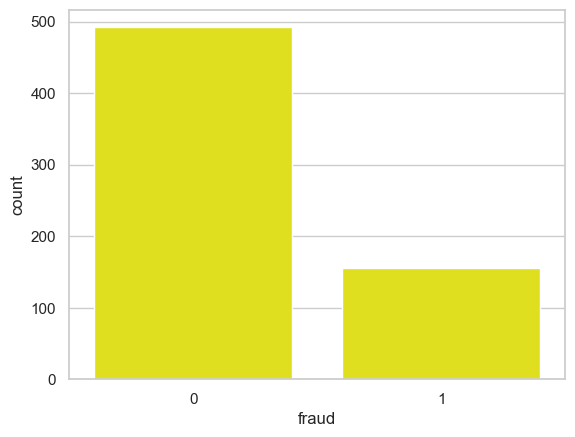

In [230]:
# Visual using seaborn libary

sns.countplot(data=df, x='fraud', color= 'yellow')

## Create Separate Database For Normal and Fraud Transactions

In [246]:
# Extracting fraudukent transactions only
fraud=df[df['fraud']==1]  #Fraud

In [238]:
fraud.head(3)

,Transaction_ID,Time,Merchant_ID,Customer_ID,Device_ID,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,IP_Address,...,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud,Year,Month
0,T00022452,4:50:22 AM,f65a902b-2396-40cc-9593-97e103f1bc15,89aaeceb-21f5-46c8-9de3-89dde6a10a75,c1e0deb4-7c97-4178-a838-38f4a2f0b57c,Refund,SamplePay,Durgapur,Chhattisgarh,140.213.7.48,...,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1,2023,Apr
1,T00032233,8:09:21 AM,d4a5efcb-4eb6-4d3a-8132-07bb3e6e13a4,8a8962f9-e84a-4573-ab0b-187311978a21,62e14f64-b0ba-4284-889a-51ac05baf33e,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,184.108.177.45,...,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1,2023,Aug
2,T00037364,7:49:01 AM,759ad138-9473-4729-8699-3d72c7ffb983,c3f53ce6-e305-4460-a71d-93bde26043ab,4281c542-ac77-4269-b4bb-1de93ac12677,Bank Transfer,Other,New Delhi,Himachal Pradesh,16.106.248.163,...,Android,2,Utilities,Online,44.19,22,106.69,1,2023,Jun


In [240]:
fraud.shape

(155, 21)

In [244]:
df.fraud.value_counts()

fraud
0    492
1    155
Name: count, dtype: int64

In [248]:
df.shape

(647, 21)

In [252]:
# Extracting Normal Transactions
normal=df[df['fraud']==0]

In [256]:
normal.head()

,Transaction_ID,Time,Merchant_ID,Customer_ID,Device_ID,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,IP_Address,...,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud,Year,Month
155,T00035531,5:43:30 AM,142e47d3-fee3-45f2-acd0-5e09d2c80e6f,90a8157e-51d4-4d6a-9fd2-ee3fd7662aba,f0123625-8072-4bbf-bb52-b1a4fbddcc9a,Bill Payment,Dummy Bank,Tinsukia,Assam,122.9.4.173,...,MacOS,2,Purchases,Mobile,36.06,26,32.21,0,2023,May
156,T00018593,8:49:32 AM,59fb590e-336d-49f2-bc1e-ffbd82236a44,4af065c8-c180-4603-b8ef-668cb5b4b49e,d1d65334-7e91-47c0-b47c-ddafaf797cff,Bank Transfer,Sigma Bank,Anand,Jharkhand,161.57.134.139,...,Windows,6,Brand Vouchers and OTT,Online,-58.43,19,18.45,0,2023,Apr
157,T00012562,3:49:10 AM,0b0fe35b-074c-4d41-914e-6273bf5d8e63,f144ed34-bca2-4358-9c74-fe93a3d788c2,d1b9211d-45ba-4b5b-a4d1-e6416c11b2a1,Bank Transfer,CReditPAY,Bhatpara,Goa,29.124.56.151,...,Windows,1,Travel bookings,Mobile,17.80,12,6.06,0,2023,Jul
158,T00023696,7:28:08 AM,33cb1784-1465-4b3c-b8ca-b9d2c3652f9f,5e269619-8450-4315-973c-2c3bad333180,e7cef30e-2550-4d95-8470-9c02cb006f70,Bank Transfer,Gamma Bank,South Dumdum,Tripura,108.130.166.72,...,Android,5,Utilities,Online,-24.80,4,64.88,0,2023,Jul
159,T00026729,7:51:09 AM,2baef2b5-adab-487b-989d-b151ef53c9fb,ac1e4927-04a8-4d67-9097-1d87ca5dbc3e,e20e1b98-aadd-4b99-bc61-8492fed4683d,Bank Transfer,Alpha Bank,Tumkur,Haryana,185.240.143.9,...,MacOS,2,Financial services and Taxes,In-store,0.49,18,52.33,0,2023,Aug


In [254]:
normal.shape

(492, 21)

## Analysing the Fraud Dataset

In [259]:
fraud.head()

,Transaction_ID,Time,Merchant_ID,Customer_ID,Device_ID,Transaction_Type,Payment_Gateway,Transaction_City,Transaction_State,IP_Address,...,Device_OS,Transaction_Frequency,Merchant_Category,Transaction_Channel,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud,Year,Month
0,T00022452,4:50:22 AM,f65a902b-2396-40cc-9593-97e103f1bc15,89aaeceb-21f5-46c8-9de3-89dde6a10a75,c1e0deb4-7c97-4178-a838-38f4a2f0b57c,Refund,SamplePay,Durgapur,Chhattisgarh,140.213.7.48,...,MacOS,1,Brand Vouchers and OTT,In-store,25.02,5,396.62,1,2023,Apr
1,T00032233,8:09:21 AM,d4a5efcb-4eb6-4d3a-8132-07bb3e6e13a4,8a8962f9-e84a-4573-ab0b-187311978a21,62e14f64-b0ba-4284-889a-51ac05baf33e,Bank Transfer,SamplePay,Rajpur Sonarpur,Himachal Pradesh,184.108.177.45,...,Windows,30,Home delivery,Mobile,-36.64,20,121.94,1,2023,Aug
2,T00037364,7:49:01 AM,759ad138-9473-4729-8699-3d72c7ffb983,c3f53ce6-e305-4460-a71d-93bde26043ab,4281c542-ac77-4269-b4bb-1de93ac12677,Bank Transfer,Other,New Delhi,Himachal Pradesh,16.106.248.163,...,Android,2,Utilities,Online,44.19,22,106.69,1,2023,Jun
3,T00015924,5:44:12 AM,d8f561e4-bded-4ef0-bcd8-5494b2e31a94,9f0c5613-7d4c-4454-bee1-c47fbba406a1,058b6488-2469-42f2-bc7f-707921d35cad,Subscription,UPI Pay,Bharatpur,Chhattisgarh,65.245.160.212,...,Android,0,Purchases,Online,-54.34,28,3611.11,1,2024,Jan
4,T00021805,9:40:59 AM,26fdd7a1-8537-4dfe-bcf7-f5a127b36682,bf9aa6d5-7d3d-43f9-8631-31336720a383,068ff12c-127a-4cfb-9899-ddde37060b28,Investment,Dummy Bank,Sagar,Mizoram,33.172.152.38,...,MacOS,1,Other,Online,12.38,25,374.89,1,2023,Jun


In [261]:
# Check Datatypes 

In [263]:
fraud.dtypes

Transaction_ID                   object
Time                             object
Merchant_ID                      object
Customer_ID                      object
Device_ID                        object
Transaction_Type                 object
Payment_Gateway                  object
Transaction_City                 object
Transaction_State                object
IP_Address                       object
Transaction_Status               object
Device_OS                        object
Transaction_Frequency             int64
Merchant_Category                object
Transaction_Channel              object
Transaction_Amount_Deviation    float64
Days_Since_Last_Transaction       int64
amount                          float64
fraud                             int64
Year                              int32
Month                            object
dtype: object

In [273]:
# Correlation
numeric_columns = fraud.select_dtypes(include=['int64','int32','float'])
cat_columns = fraud.select_dtypes(include='object')
numeric_columns.corr()

,Transaction_Frequency,Transaction_Amount_Deviation,Days_Since_Last_Transaction,amount,fraud,Year
Transaction_Frequency,1.000000,0.112079,0.048399,-0.047628,NaN,-0.068477
Transaction_Amount_Deviation,0.112079,1.000000,-0.057579,-0.034097,NaN,-0.005956
Days_Since_Last_Transaction,0.048399,-0.057579,1.000000,0.078918,NaN,-0.003681
amount,-0.047628,-0.034097,0.078918,1.000000,NaN,0.022114
fraud,NaN,NaN,NaN,NaN,NaN,NaN
Year,-0.068477,-0.005956,-0.003681,0.022114,NaN,1.000000


## Visualizing entire Dataset

<IPython.core.display.Javascript object>

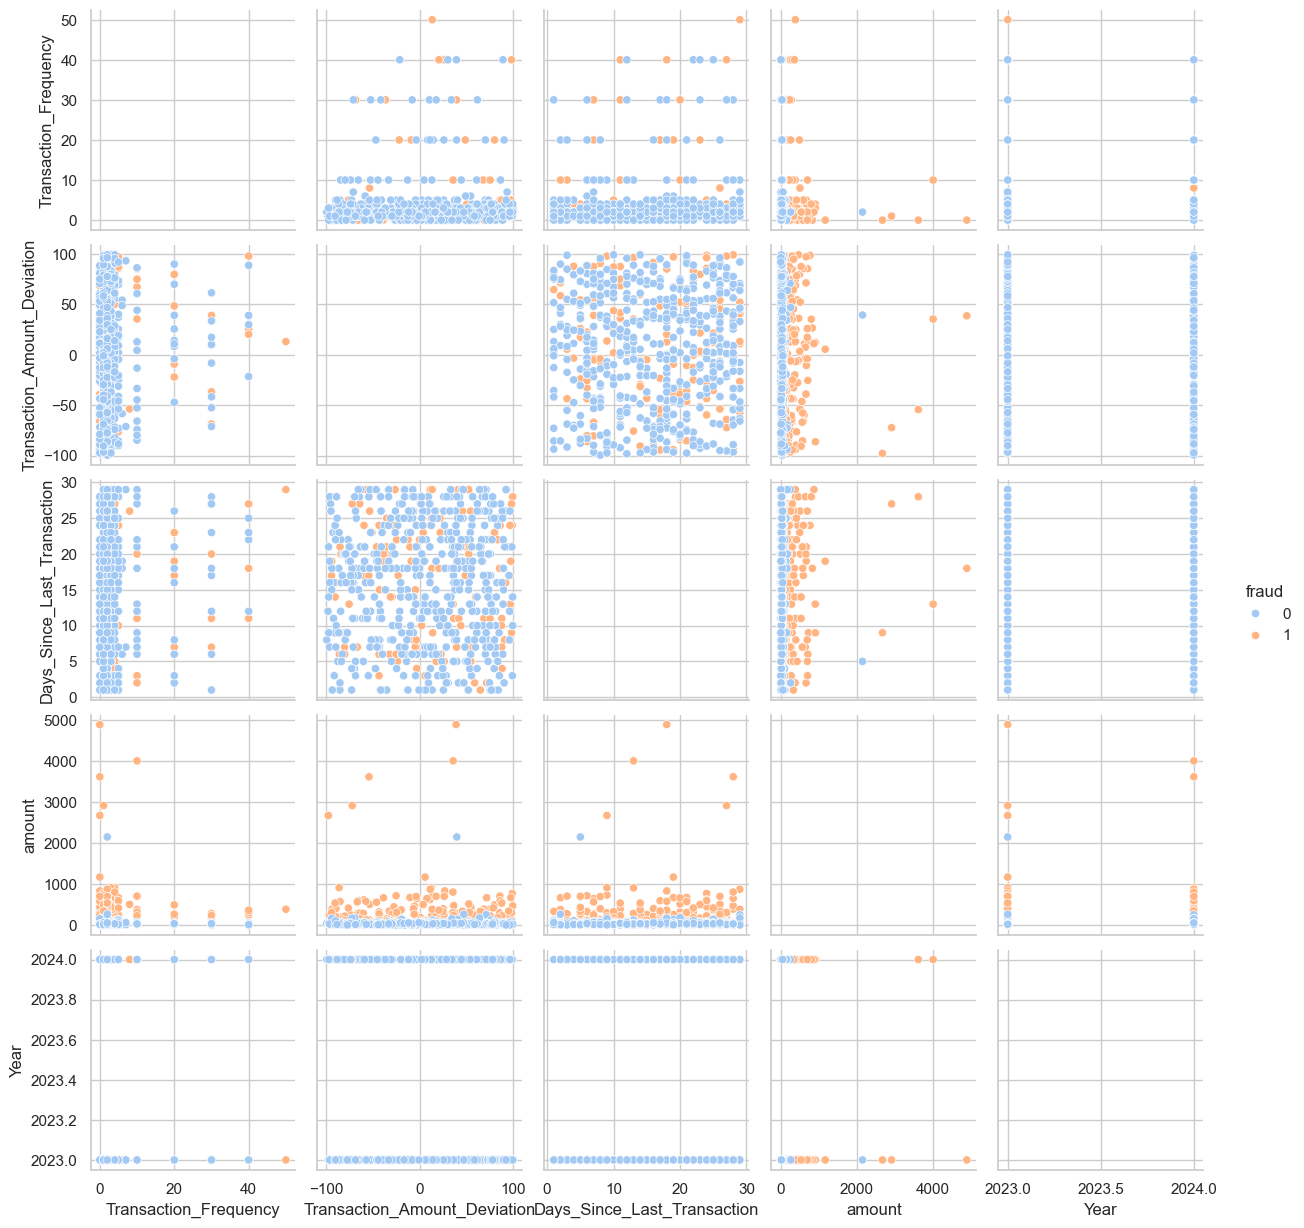

In [280]:
# Visualizing the different features basis the fraud occurences as a subplot
sns.pairplot(data=df, hue='fraud', palette='pastel', diag_kind='dist')

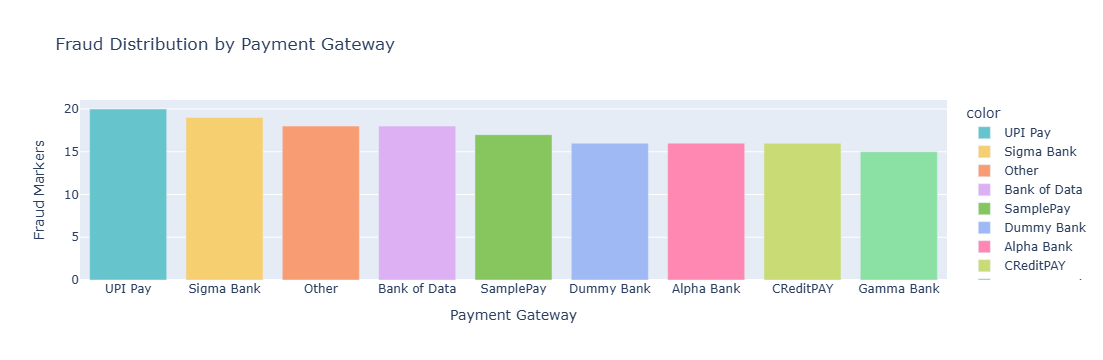

In [322]:
# Plot 1: Fraud Distribution by Payment Gateway
fig = px.bar(
    x=fraud['Payment_Gateway'].value_counts().index,
    y=fraud['Payment_Gateway'].value_counts().values,
    color=fraud['Payment_Gateway'].value_counts().index,
    title='Fraud Distribution by Payment Gateway',
    labels={'x': 'Payment Gateway', 'y': 'Fraud Markers'},
    color_discrete_sequence=px.colors.qualitative.Pastel
)
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

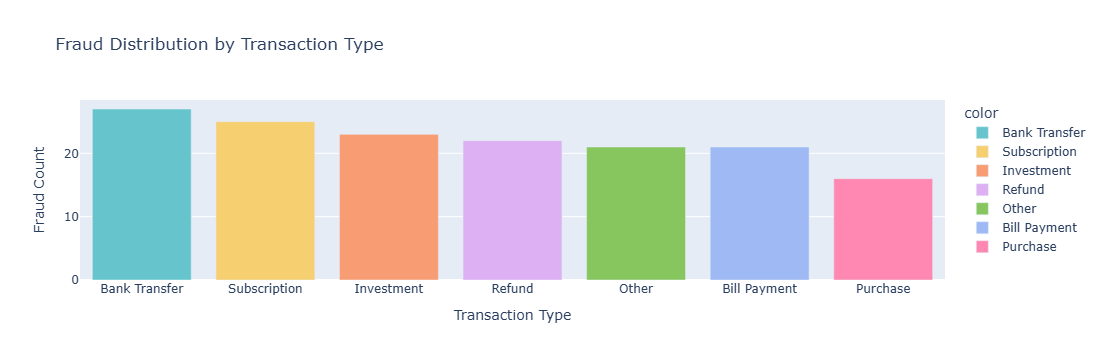

In [294]:
# Plot 1: Fraud distribution by transaction type

# Assuming `fraud` is a DataFrame and has a column 'Transaction_Type'
# Ensure that 'Transaction_Type' is a valid column in the fraud DataFrame

fig = px.bar(
    x=fraud['Transaction_Type'].value_counts().index,  # Get unique transaction types
    y=fraud['Transaction_Type'].value_counts().values,  # Get the count of each transaction type
    color=fraud['Transaction_Type'].value_counts().index,  # Use transaction type for colors
    title="Fraud Distribution by Transaction Type",  # Title of the plot
    labels={'x': 'Transaction Type', 'y': 'Fraud Count'},  # Label the axes
    color_discrete_sequence=px.colors.qualitative.Pastel) # Set color palette
fig.update_layout(
    xaxis={'categoryorder': 'total descending'} ) # Order categories by total count in descending order
fig.show()


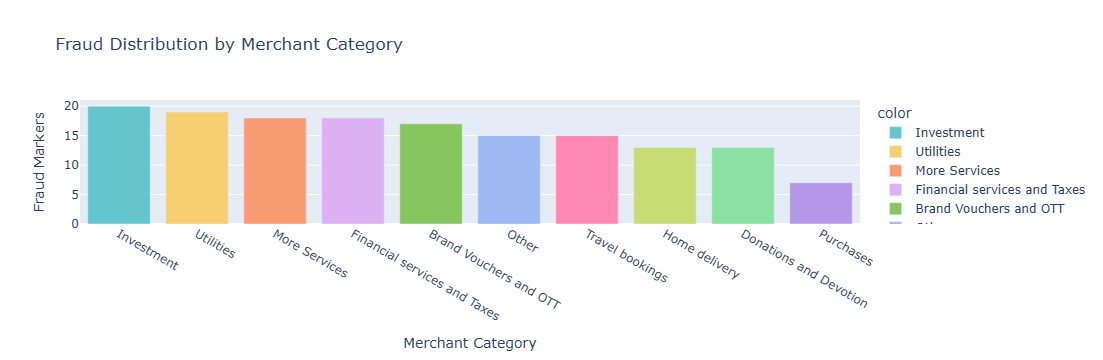

In [324]:
# Plot 2: Fraud Distribution by Merchant Category
fig = px.bar(
    x=fraud['Merchant_Category'].value_counts().index,
    y=fraud['Merchant_Category'].value_counts().values,
    color=fraud['Merchant_Category'].value_counts().index,
    title='Fraud Distribution by Merchant Category',
    labels={'x': 'Merchant Category', 'y': 'Fraud Markers'},
    color_discrete_sequence=px.colors.qualitative.Pastel
)
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

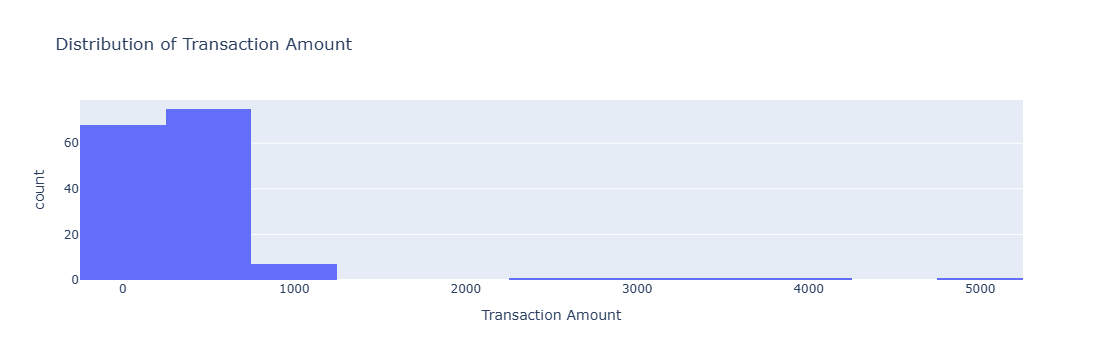

In [326]:
# Plot 3: Distribution of Transaction Amount (Histogram)
fig = px.histogram(
    fraud, 
    x='amount', 
    nbins=20,
    title='Distribution of Transaction Amount',
    labels={'amount': 'Transaction Amount'}
)
fig.show()

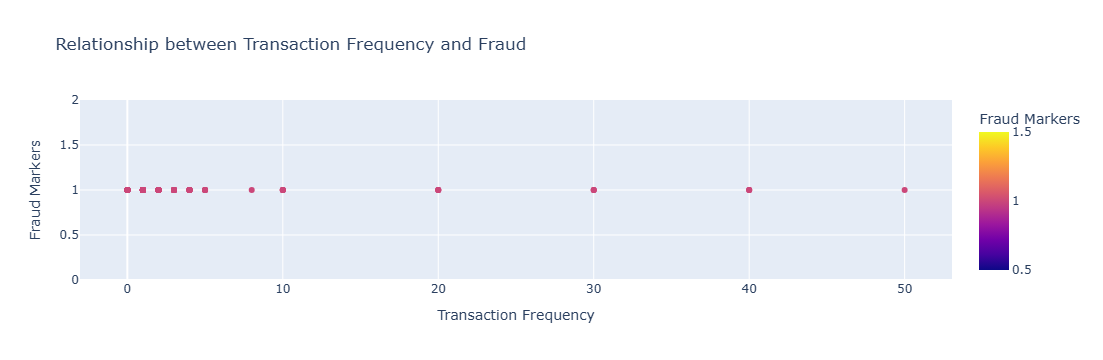

In [328]:
# Plot 4: Relationship between Transaction Frequency and Fraud (Scatter Plot)
fig = px.scatter(
    fraud, 
    x='Transaction_Frequency', 
    y='fraud',
    title='Relationship between Transaction Frequency and Fraud',
    labels={'Transaction_Frequency': 'Transaction Frequency', 'fraud': 'Fraud Markers'},
    color='fraud', 
    color_discrete_map={0: 'lightblue', 1: 'orange'}
)
fig.show()


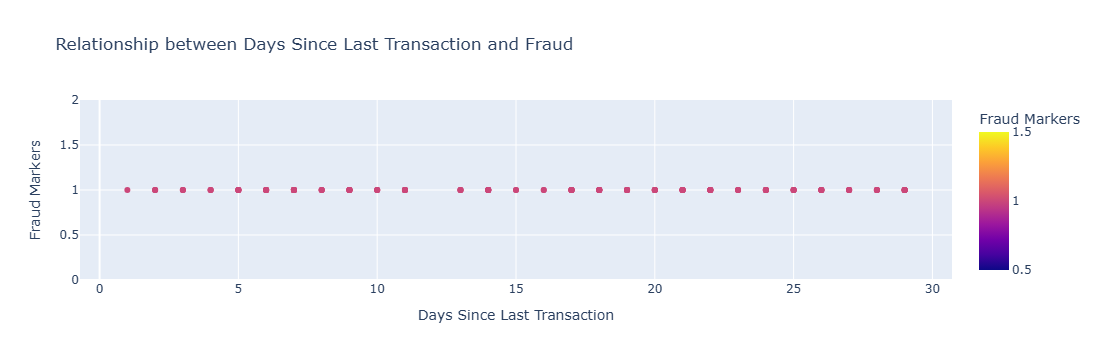

In [330]:
# Plot 5: Relationship between Days Since Last Transaction and Fraud (Scatter Plot)
fig = px.scatter(
    fraud, 
    x='Days_Since_Last_Transaction', 
    y='fraud',
    title='Relationship between Days Since Last Transaction and Fraud',
    labels={'Days_Since_Last_Transaction': 'Days Since Last Transaction', 'fraud': 'Fraud Markers'},
    color='fraud', 
    color_discrete_map={0: 'lightblue', 1: 'orange'}
)
fig.show()

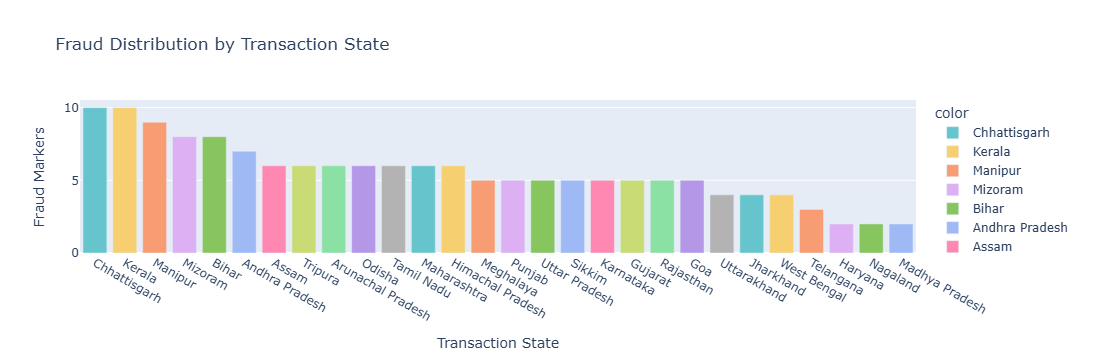

In [332]:
# Plot 6: Fraud Distribution by Transaction State
fig = px.bar(
    x=fraud['Transaction_State'].value_counts().index,
    y=fraud['Transaction_State'].value_counts().values,
    color=fraud['Transaction_State'].value_counts().index,
    title='Fraud Distribution by Transaction State',
    labels={'x': 'Transaction State', 'y': 'Fraud Markers'},
    color_discrete_sequence=px.colors.qualitative.Pastel
)
fig.update_layout(xaxis={'categoryorder': 'total descending'})
fig.show()

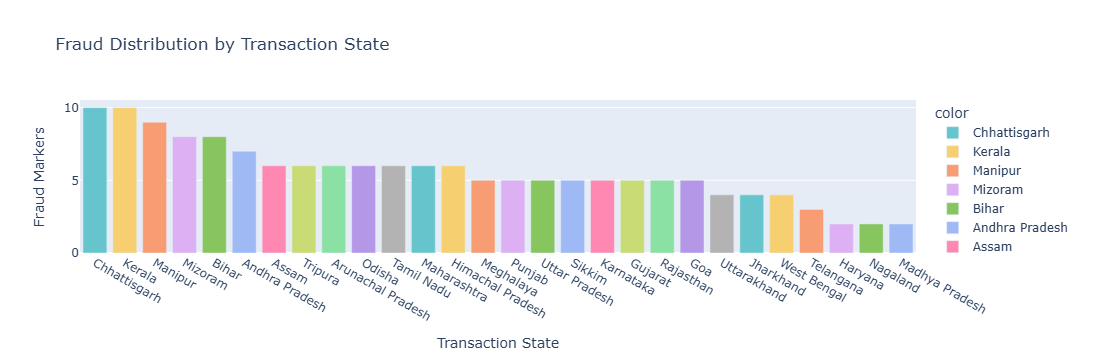

In [336]:
# Plot 7: Relationship between Transaction State and Fraud using bar plot
fig = px.bar(
    x=fraud['Transaction_State'].value_counts().index,
    y=fraud['Transaction_State'].value_counts().values,
    color=fraud['Transaction_State'].value_counts().index,
    title='Fraud Distribution by Transaction State',
    labels={'x': 'Transaction State', 'y': 'Fraud Markers'},
    color_discrete_sequence=px.colors.qualitative.Pastel
)

# Sorting categories by total fraud markers (descending)
fig.update_layout(xaxis={'categoryorder': 'total descending'})

# Display the plot
fig.show()


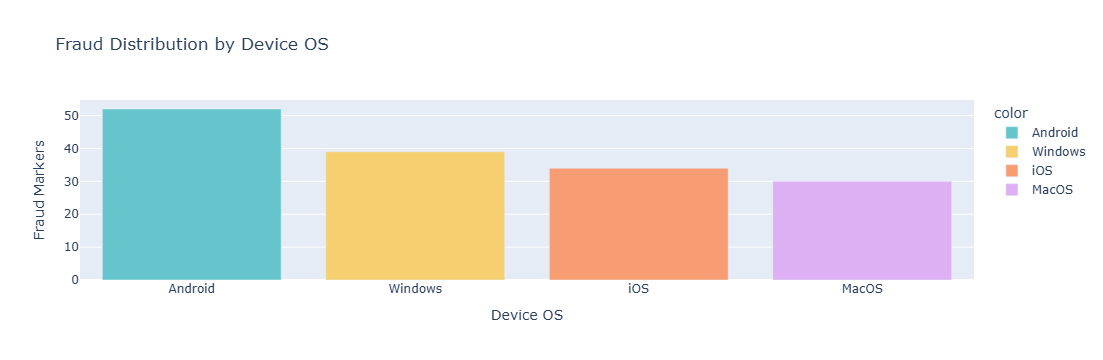

In [334]:
# Plot 8: Relationship between Device OS and Fraud using bar plot
fig = px.bar(
    x=fraud['Device_OS'].value_counts().index,
    y=fraud['Device_OS'].value_counts().values,
    color=fraud['Device_OS'].value_counts().index,
    title='Fraud Distribution by Device OS',
    labels={'x': 'Device OS', 'y': 'Fraud Markers'},
    color_discrete_sequence=px.colors.qualitative.Pastel
)

# Sorting categories by total fraud markers (descending)
fig.update_layout(xaxis={'categoryorder': 'total descending'})

# Display the plot
fig.show()


# Conclusion

1. Improve Transaction Monitoring: Set up systems that monitor transactions in real-time, so you can quickly spot any suspicious activity. Use data from past transactions to help identify patterns, like unusual amounts or frequency.

2. Strengthen Platform Security: Work with platforms like ICICI, HDFC, and GooglePay to improve security. This includes adding multi-factor authentication (MFA), transaction verification, and fraud detection systems tailored to the specific platform.

3. Monitor Risky Merchant Categories: Pay extra attention to high-risk areas such as home delivery services, travel bookings, and utility payments. Use extra checks, like verifying transactions or applying risk-based authentication, to protect these categories.

4. Focus on Moderate-Value Transactions: Watch transactions in the range of 250 to 750 units, as these are often targets for fraud. By focusing on these, you can spot fraud early and reduce potential losses.

5. Assess Geographic Risk: Look at regional fraud patterns and focus your efforts in areas with higher risks, such as Himachal Pradesh, Rajasthan, Meghalaya, and Bihar. Tailor your fraud prevention strategies to these regions to reduce local risks.

6. Secure Operating Systems: Work with Android developers to fix security issues and improve fraud protection for UPI apps on Android devices. This will help prevent fraudsters from exploiting system weaknesses.

7. Keep Monitoring and Adapting: Regularly review your fraud detection strategies to stay ahead of fraudsters. Use machine learning and advanced analytics to adapt to new fraud tactics as they emerge.

8. Conduct Regular Security Audits: Regularly check your systems for any security gaps. Ensure they comply with industry standards and regulations to keep UPI transactions safe.

9. Educate Users: Teach users about common fraud schemes and phishing attacks, so they can spot and report suspicious activity. This will help create a more secure environment for everyone.

10. Collaborate with Others: Work with other businesses, financial institutions, law enforcement, and regulators to share information about fraud. By collaborating, you can tackle fraud more effectively.